# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [87]:
import pandas as pd
import numpy as np
df = pd.read_csv("nss15.tsv", sep="\t", error_bad_lines=False)
df.head()

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [88]:
df.shape

(357727, 19)

### List the columns and their data types

In [89]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [90]:
#diag = diagnosis
#race :0 = not stated , 1 = white. 2 = black
#prod1/2 = are the products involved

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [91]:
df['sex'].value_counts()
#1 = male
#2 = female
#0 = not recorded

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [92]:
df['sex'] = df['sex'].astype('str').replace("1", "male").replace("2", "female")
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex             object
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

In [93]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [94]:
#df.sex.replace(2,"Female", inplace=True)

## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [95]:
df.sex.value_counts()

male      195071
female    162654
0              2
Name: sex, dtype: int64

In [96]:
df.sex.replace("0", "Not Recorded", inplace = True)

## Graph the number of men and women, but don’t included the “Not Recorded” records

In [97]:
df.sex.value_counts()

male            195071
female          162654
Not Recorded         2
Name: sex, dtype: int64

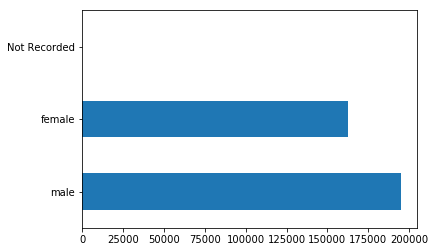

In [98]:
%matplotlib inline
df.sex.value_counts().plot(kind='barh')

In [99]:
df[df.sex!='Not Recorded'].sex.value_counts()

male      195071
female    162654
Name: sex, dtype: int64

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [100]:
df['sex'] = df['sex'].replace("Not Recorded", np.nan)

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

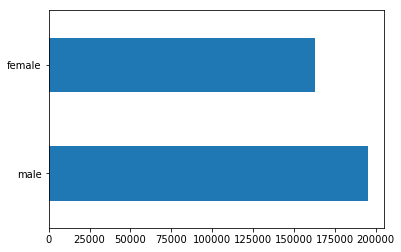

In [101]:
df.sex.value_counts().plot(kind='barh')

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [102]:
#df[df.narrl/str.contains[PUNCH] & .....[WALL]]

In [103]:
df_punch =  df[df.narr1.str.contains("PUNCH.*WALL")]

## Graph the gender distribution of wall-punching.

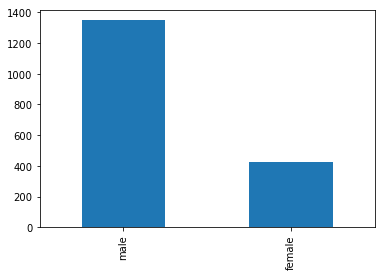

In [104]:
df_punch['sex'].value_counts().plot(kind="bar")

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [147]:
df_punch['age'].mean()

24.303611738148984

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [106]:
#notes from class  :  df_punch['trmt_date'].str[0:2].value_counts().head(1)

In [107]:
#df.narr1.str.extract("FELL OFF(\w+)").dropna()

In [146]:
df_punch['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


09    175
06    170
10    162
05    162
04    156
03    151
11    145
12    142
07    134
01    132
08    131
02    112
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


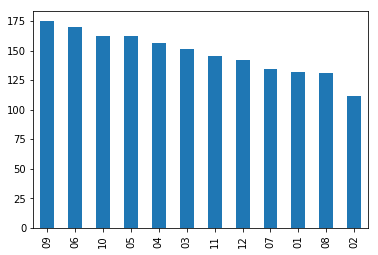

In [108]:
df_punch['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts().plot(kind='bar')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


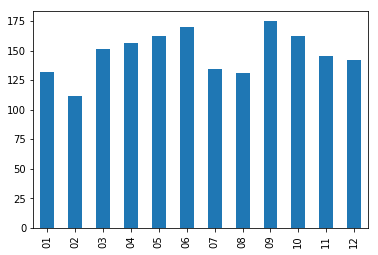

In [109]:
df_punch['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts().sort_index().plot(kind='bar')

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [110]:
#df_air = df[df['prod1'] == 381]
#df_air['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts()
df['prod1'] = df.prod1.astype(str).str.pad(4, fillchar ='0')
df['prod2'] = df.prod1.astype(str).str.pad(4, fillchar ='0')
df[df['prod1'] == '0381']['trmt_date'].str.extract("(\d\d)/\d\d/\d\d\d\d").value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


07    45
06    43
08    42
09    36
05    32
10    32
12    17
04    17
11    15
03    14
02     9
01     8
Name: trmt_date, dtype: int64

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [111]:
#if prod1 was not a string column yet
#(you didn;t do dtype={'prod1': 'str'})
#df.prod1.astype(str).str.pad(4, fillchar='0')
#If you set the type, you can do this without.astype(str)

In [112]:
punch_df = df[(df.narr1.str.contains("PUNCH.*")) | (df.narr1.str.contains("PUNCH.*"))]
punch_df['prod1'].value_counts().head()

1884    1796
1894     566
1893     244
1207     159
4004     122
Name: prod1, dtype: int64

In [113]:
punch_df['prod2'].value_counts().head()

1884    1796
1894     566
1893     244
1207     159
4004     122
Name: prod2, dtype: int64

In [114]:
# 1894,"Windows and window glass, other than storm windows"
# 1893,"Doors, other or not specified"
# 1207,"Boxing (activity, apparel or equipment)"

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [115]:
df.prod1 = df.prod1.replace(np.nan, '0000')
df.prod2 = df.prod2.replace(np.nan, '0000')
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,male,0,NaN,57,NaN,33,1,9,0,1267,1267,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,male,1,NaN,57,NaN,34,1,1,0,1439,1439,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,3274,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,male,0,NaN,71,PAIN,35,1,0,0,0611,0611,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,female,3,HISPANIC,62,NaN,75,1,0,0,1893,1893,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [116]:
df['prod1'].value_counts().add(df['prod2'].value_counts(), fill_value=0).head(20)

1842    57218
1807    56510
4076    33414
1205    28190
5040    25474
1211    23228
4074    16478
1884    15510
1893    15378
4057    14654
0464    14562
0611    14368
1267    14280
3299    14114
0679    10162
1615     7346
4078     7330
1233     6394
4056     6232
5041     6126
dtype: int64

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [148]:
df_inj = df['prod1'].value_counts().add(df['prod2'].value_counts(), fill_value=0).reset_index()
df_inj.head()

,index,0
0,1842,57218
1,1807,56510
2,4076,33414
3,1205,28190
4,5040,25474


In [149]:
df_inj.columns = ['product_code', 'injury_count']
df_inj.head()

,product_code,injury_count
0,1842,57218
1,1807,56510
2,4076,33414
3,1205,28190
4,5040,25474


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [119]:
df.prod1.astype(str).str.pad(4, fillchar='0').head()

0    1267
1    1439
2    3274
3    0611
4    1893
Name: prod1, dtype: object

## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [151]:
df_cat = pd.read_csv('categories-cleaned.txt', sep =",", names = ("code", "description"))
df_cat.code = df_cat.code.astype(str).str.pad(4, fillchar='0')

In [152]:
df_cat.head()

,code,description
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories


In [156]:
df_final = df_inj.merge(df_cat, left_on='product_code', right_on='code')
df_final.head()

,product_code,injury_count,code,description
0,1842,57218,1842,Stairs or steps (excluding pull-down and foldi...
1,1807,56510,1807,Floors or flooring materials
2,4076,33414,4076,"Beds or bedframes, other or not specified"
3,1205,28190,1205,"Basketball (activity, apparel or equipment)"
4,5040,25474,5040,Bicycles or accessories (excluding mountain or...


In [157]:
df_final.drop('product_code', axis=1, inplace=True)
df_final.head()

,injury_count,code,description
0,57218,1842,Stairs or steps (excluding pull-down and foldi...
1,56510,1807,Floors or flooring materials
2,33414,4076,"Beds or bedframes, other or not specified"
3,28190,1205,"Basketball (activity, apparel or equipment)"
4,25474,5040,Bicycles or accessories (excluding mountain or...


### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [159]:
df_cat.head(1)

,code,description
0,0102,Wringer washing machines


## Graph the top 10 most popular products for injuries 

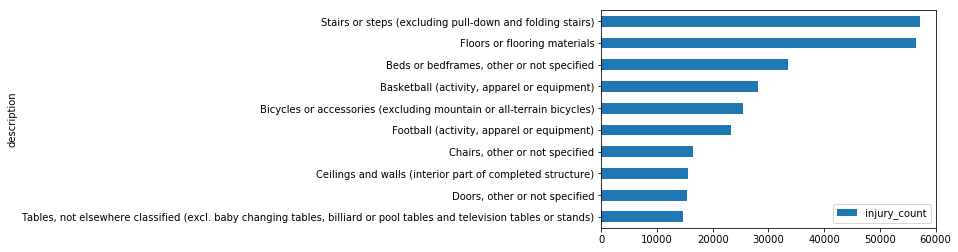

In [160]:
df_final.head(10).sort_index(ascending= False).plot(kind='barh', x='description')